# Загрузка данных

In [47]:
import pandas as pd

In [48]:
df1 = pd.read_csv("churn-bigml-80.csv")
df2 = pd.read_csv("churn-bigml-20.csv")
df = pd.concat([df1, df2]).reset_index(drop=True)
display(df)

State  Account length  Area code International plan Voice mail plan  \
0       KS             128        415                 No             Yes   
1       OH             107        415                 No             Yes   
2       NJ             137        415                 No              No   
3       OH              84        408                Yes              No   
4       OK              75        415                Yes              No   
...    ...             ...        ...                ...             ...   
3328    WI             114        415                 No             Yes   
3329    AL             106        408                 No             Yes   
3330    VT              60        415                 No              No   
3331    WV             159        415                 No              No   
3332    CT             184        510                Yes              No   

      Number vmail messages  Total day minutes  Total day calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
3328                     26              137.1               88   
3329                     29               83.6              131   
3330                      0              193.9              118   
3331                      0              169.8              114   
3332                      0              213.8              105   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0                45.07              197.4               99             16.78   
1                27.47              195.5              103             16.62   
2                41.38              121.2              110             10.30   
3                50.90               61.9               88              5.26   
4                28.34              148.3              122             12.61   
...                ...                ...              ...               ...   
3328             23.31              155.7              125             13.23   
3329             14.21              203.9              131             17.33   
3330             32.96               85.0              110              7.23   
3331             28.87              197.7              105             16.80   
3332             36.35              159.6               84             13.57   

      Total night minutes  Total night calls  Total night charge  \
0                   244.7                 91               11.01   
1                   254.4                103               11.45   
2                   162.6                104                7.32   
3                   196.9                 89                8.86   
4                   186.9                121                8.41   
...                   ...                ...                 ...   
3328                247.6                 94               11.14   
3329                229.5                 73               10.33   
3330                210.1                134                9.45   
3331                193.7                 82                8.72   
3332                139.2                137                6.26   

      Total intl minutes  Total intl calls  Total intl charge  \
0                   10.0                 3               2.70   
1                   13.7                 3               3.70   
2                   12.2                 5               3.29   
3                    6.6                 7               1.78   
4                   10.1                 3               2.73   
...                  ...               ...                ...   
3328                11.5                 7            

# Предобработка данных

## Проверка на дубликаты:

In [49]:
print("Кол-во дубликатов: ", df[df.duplicated()].shape[0])

Кол-во дубликатов:  0


## Проверка на None или NaN значения:

In [50]:
df.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

## String to int

Закодируем строковые категориальные значения целыми числами.

In [51]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for i in ["State", "International plan", "Voice mail plan", "Churn"]:
    df[i] = label.fit_transform(df[i])
display(df)

State  Account length  Area code  International plan  Voice mail plan  \
0        16             128        415                   0                1   
1        35             107        415                   0                1   
2        31             137        415                   0                0   
3        35              84        408                   1                0   
4        36              75        415                   1                0   
...     ...             ...        ...                 ...              ...   
3328     48             114        415                   0                1   
3329      1             106        408                   0                1   
3330     46              60        415                   0                0   
3331     49             159        415                   0                0   
3332      6             184        510                   1                0   

      Number vmail messages  Total day minutes  Total day calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
3328                     26              137.1               88   
3329                     29               83.6              131   
3330                      0              193.9              118   
3331                      0              169.8              114   
3332                      0              213.8              105   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0                45.07              197.4               99             16.78   
1                27.47              195.5              103             16.62   
2                41.38              121.2              110             10.30   
3                50.90               61.9               88              5.26   
4                28.34              148.3              122             12.61   
...                ...                ...              ...               ...   
3328             23.31              155.7              125             13.23   
3329             14.21              203.9              131             17.33   
3330             32.96               85.0              110              7.23   
3331             28.87              197.7              105             16.80   
3332             36.35              159.6               84             13.57   

      Total night minutes  Total night calls  Total night charge  \
0                   244.7                 91               11.01   
1                   254.4                103               11.45   
2                   162.6                104                7.32   
3                   196.9                 89                8.86   
4                   186.9                121                8.41   
...                   ...                ...                 ...   
3328                247.6                 94               11.14   
3329                229.5                 73               10.33   
3330                210.1                134                9.45   
3331                193.7                 82                8.72   
3332                139.2                137                6.26   

      Total intl minutes  Total intl calls  Total intl charge  \
0                   10.0                 3               2.70   
1                   13.7                 3               3.70   
2                   12.2                 5               3.29   
3                    6.6                 7               1.78   
4                   10.1                 3               2.73   
...                  ...               ...                ...   
3328               

In [52]:
df.dtypes

State                       int64
Account length              int64
Area code                   int64
International plan          int64
Voice mail plan             int64
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                       int64
dtype: object

## Разделение признаков

Разделим признаки на категориальные и количественные. Для этого сначала посмотрим на количество уникальных значений каждого признака.

In [53]:
for i in df.columns:
    print('{} : {}'.format(i, len(df[i].unique())))

State : 51
Account length : 212
Area code : 3
International plan : 2
Voice mail plan : 2
Number vmail messages : 46
Total day minutes : 1667
Total day calls : 119
Total day charge : 1667
Total eve minutes : 1611
Total eve calls : 123
Total eve charge : 1440
Total night minutes : 1591
Total night calls : 120
Total night charge : 933
Total intl minutes : 162
Total intl calls : 21
Total intl charge : 162
Customer service calls : 10
Churn : 2


К категориальным данным можно отнести название Штата, код города, наличие/отсутствие международного пакета, наличие/отсутствие пакета голосовой почты и отказ/не отказ от сервиса.

In [54]:
categorical = ["State", "Area code", "International plan", "Voice mail plan", "Churn"]
cont = []
for i in df.columns:
    if i not in categorical:
        cont.append(i)
cont

['Account length',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls']

## Нормализация

Приведем количественные значения к одному интервалу.

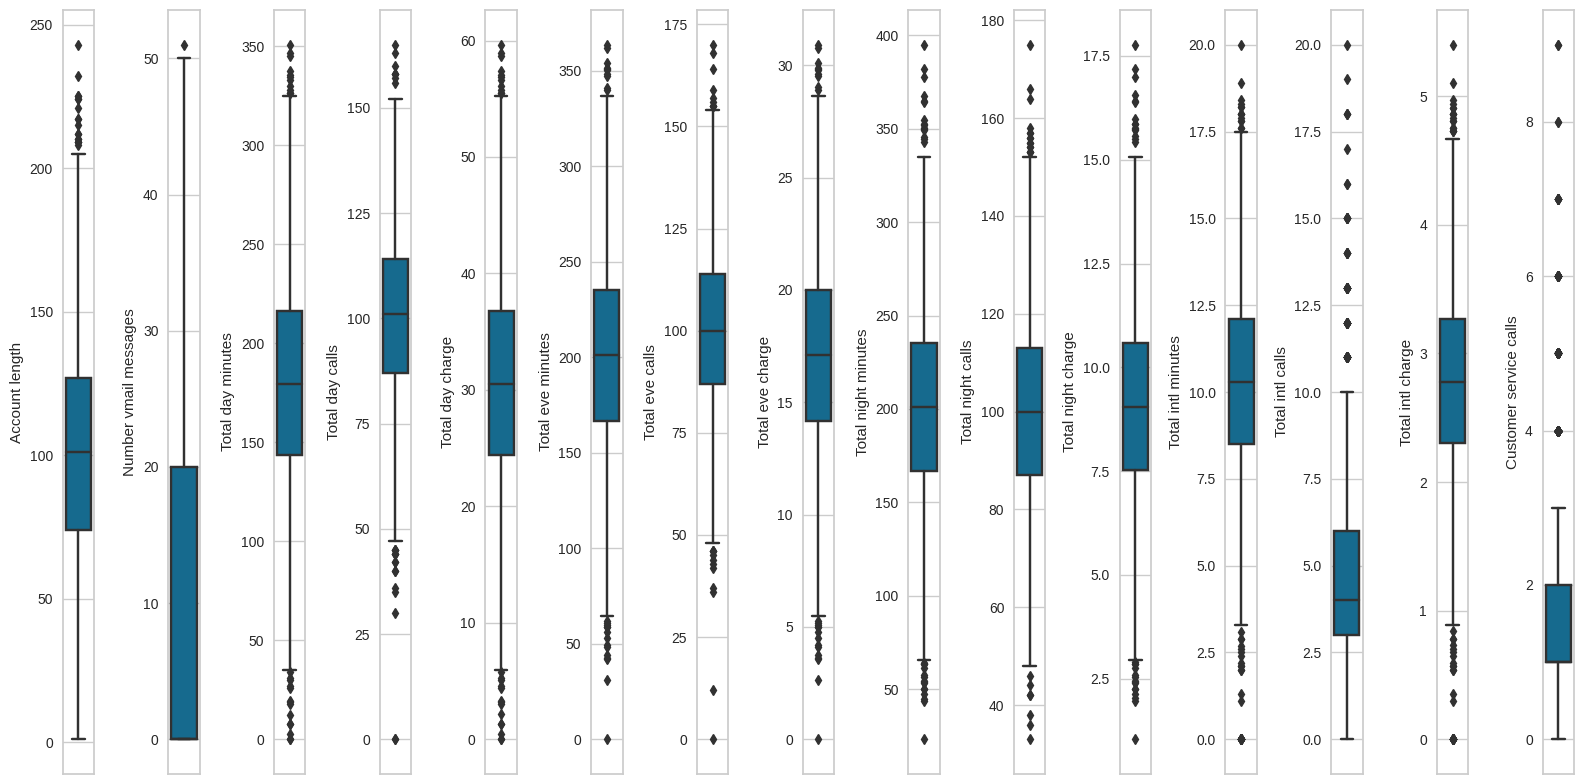

In [23]:
from matplotlib import pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(16, 8))
for i, name in enumerate(cont):
    ax = fig.add_subplot(1, len(cont), i+1)
    sns.boxplot(y = df[name], ax=ax)
fig.tight_layout()

Применим 

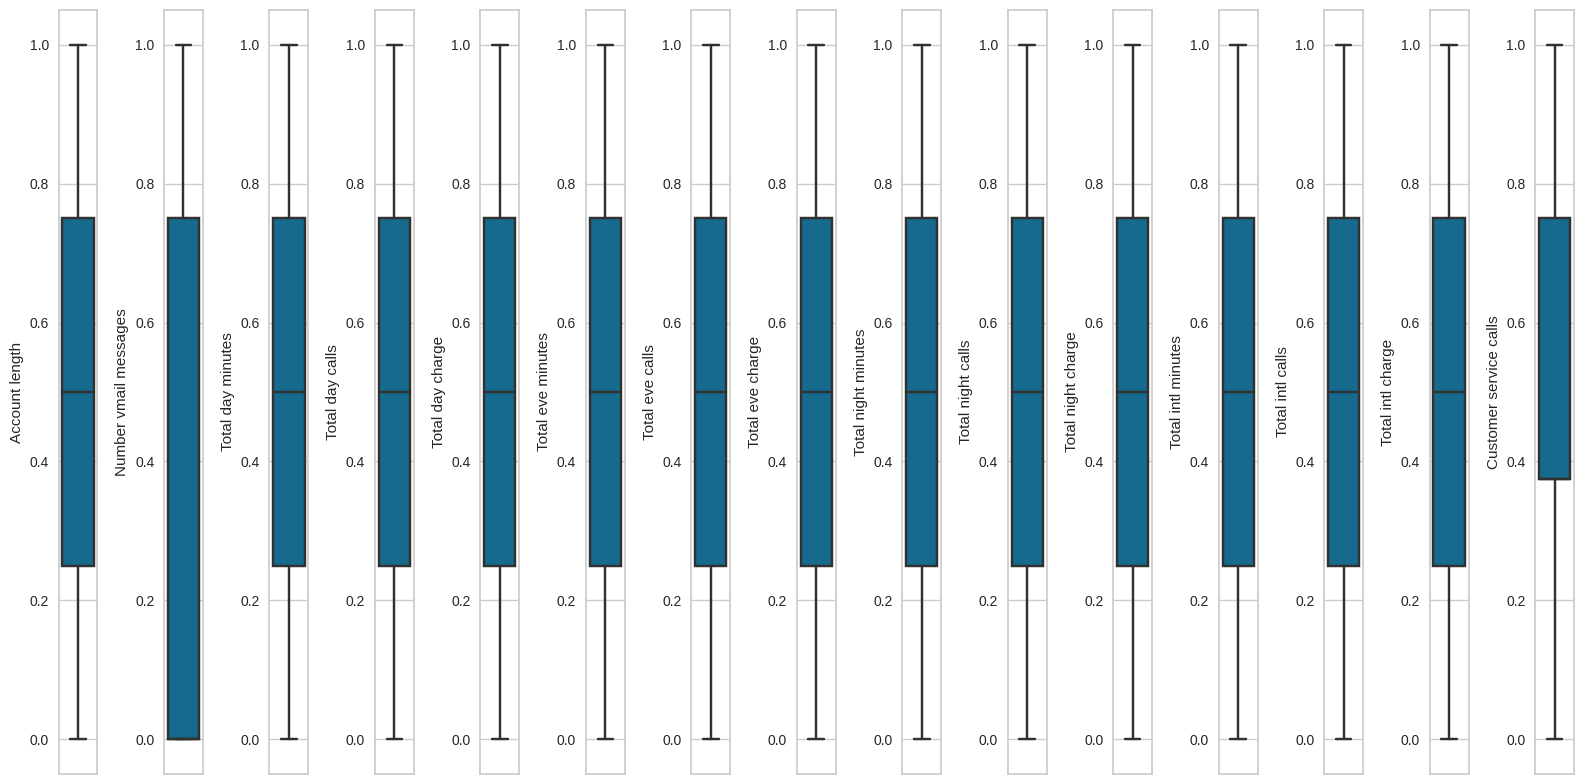

In [24]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(n_quantiles=5, random_state=1)
df[cont] = qt.fit_transform(df[cont])

fig = plt.figure(figsize=(16, 8))
for i, name in enumerate(cont):
    ax = fig.add_subplot(1, len(cont), i+1)
    sns.boxplot(y = df[name], ax=ax)
fig.tight_layout()

## Матрица корреляций

<Axes: >

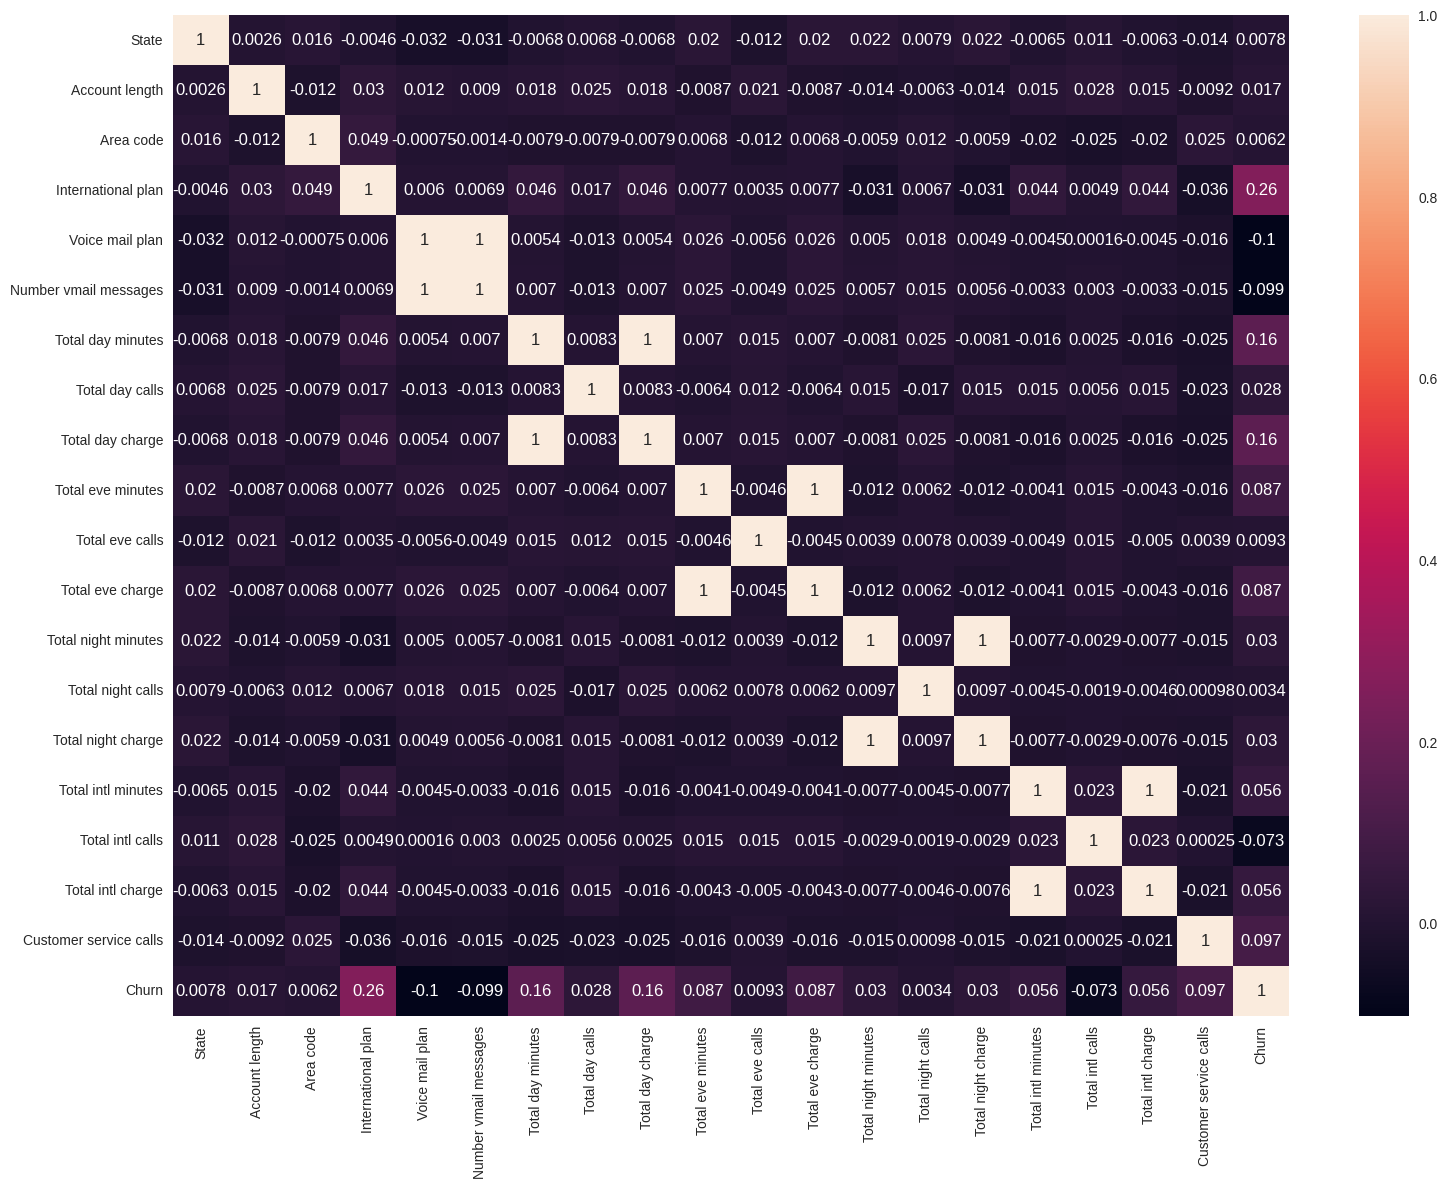

In [25]:
plt.figure(figsize = (18,13))
sns.heatmap(df.corr(), annot=True)

Удалим характеристики, которые высоко коррелируют с другими.

In [26]:
df = df.drop(['Voice mail plan', 'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge'], axis=1)

## Тренировочная и тестовая выборки

In [27]:
from sklearn.model_selection import train_test_split
X = df.drop(['Churn'], axis=1)
y = df[df.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(X_train.shape)
print(X_test.shape)

(2666, 14)
(667, 14)


# Обучение моделей

In [28]:
from sklearn.metrics import roc_auc_score, f1_score, recall_score, precision_score
def calc_performance(Y_test, Y_pred):
    return [roc_auc_score(Y_test, Y_pred), 
            f1_score(Y_test, Y_pred), 
            recall_score(Y_test, Y_pred), 
            precision_score(Y_test, Y_pred)]
scores = []
performance = []

## Логистическая регрессия

In [29]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=1, max_iter = 10000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = lr.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 86.06%


In [52]:
print(lr.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 10000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 1, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [56]:
lr = LogisticRegression(random_state=1, max_iter = 10000, l1_ratio = 0.1, n_jobs = -1, penalty='elasticnet', solver='saga')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = lr.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 85.91%


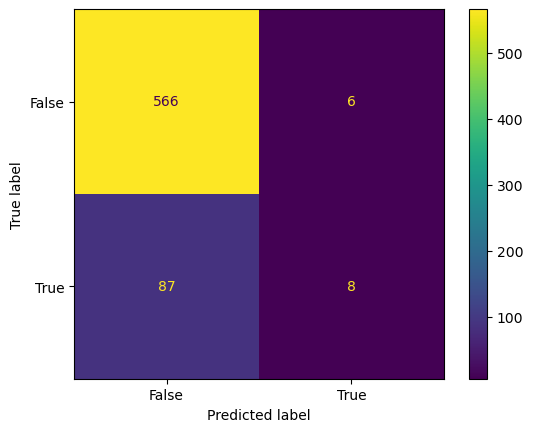

In [68]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=[False, True])
cm_display.plot()
plt.show()

In [67]:
print("roc auc, f1, recall, precision")
calc_performance(y_test, y_pred)

roc auc, f1, recall, precision


[0.5368605079131394, 0.14678899082568805, 0.08421052631578947, 0.5714285714285714]

In [69]:
scores.append("Logistic regression: " + format(round(accuracy * 100, 2)) + "%")
performance.append(["Logistic regression"] + calc_performance(y_test, y_pred))

## K - Nearest Neighbors

In [116]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_jobs = -1)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = knn.score(X_test, y_test)
print(y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 

In [117]:
print(knn.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': -1, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [118]:
knn_scores = []
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i, weights = 'distance', p = 1, n_jobs = -1)
    knn.fit(X_train, y_train)
    knn_scores.append(knn.score(X_test, y_test))

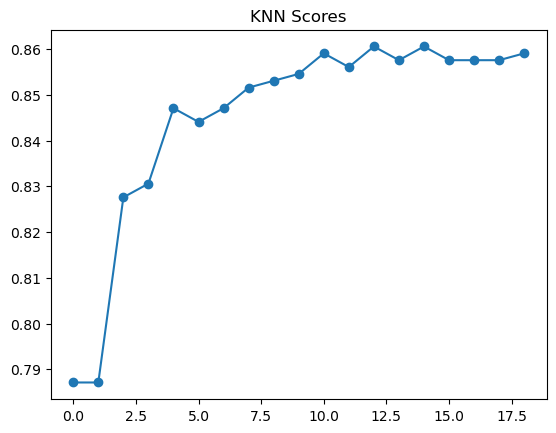

In [119]:
plt.plot(knn_scores,'-o')
plt.title('KNN Scores')
plt.show()

In [120]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier(n_neighbors=13, weights = 'distance', p = 1, n_jobs = -1)
knn_params = {'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knn = GridSearchCV(knn, knn_params, n_jobs=-1)
grid_knn.fit(X_train, y_train)
print(grid_knn.best_params_)

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scip

{'algorithm': 'auto'}


In [121]:
print("Accuracy: {:.2f}%".format(knn_scores[12] * 100))

Accuracy: 86.06%


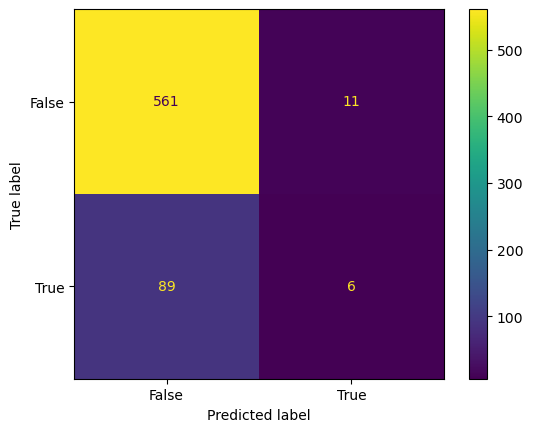

In [122]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=[False, True])
cm_display.plot()
plt.show()

In [90]:
print("roc auc, f1, recall, precision")
calc_performance(y_test, y_pred)

roc auc, f1, recall, precision


[0.5219635627530365, 0.10714285714285714, 0.06315789473684211, 0.35294117647058826]

In [91]:
scores.append("KNN: " + format(round(accuracy * 100, 2)) + "%")
performance.append(["KNN"] + calc_performance(y_test, y_pred))

## SVM

In [124]:
from sklearn.svm import SVC
svm = SVC(random_state=1)

svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(y_pred)
accuracy = svm.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [106]:
print(svm.get_params())

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [125]:
svm = SVC(random_state=1)
svm_params = {'C' : [1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 2],
              'kernel': ["linear", "poly", "rbf", "sigmoid"],
              'shrinking': [True, False],
              'tol': [1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8],
              'class_weight': [None, 'balanced'],
              'decision_function_shape' : ['ovo', 'ovr']}
grid_svm = GridSearchCV(svm, svm_params, n_jobs=-1)
grid_svm.fit(X_train, y_train)
print(grid_svm.best_params_)



<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scip

{'C': 1, 'class_weight': None, 'decision_function_shape': 'ovo', 'kernel': 'linear', 'shrinking': True, 'tol': 0.001}


In [126]:
svm = SVC(random_state=1, C=1, class_weight=None, decision_function_shape='ovo', kernel='linear', shrinking=True, tol=0.001)

svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

accuracy = svm.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 85.76%


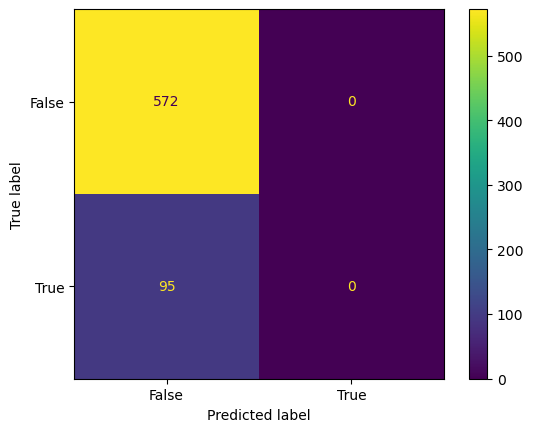

In [127]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=[False, True])
cm_display.plot()
plt.show()

In [128]:
print("roc auc, f1, recall, precision")
calc_performance(y_test, y_pred)

roc auc, f1, recall, precision


/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.5, 0.0, 0.0, 0.0]

In [129]:
scores.append("SVM: " + format(round(accuracy * 100, 2)) + "%")
performance.append(["SVM"] + calc_performance(y_test, y_pred))

/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Decision Tree

In [131]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 1)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = dt.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 89.81%


In [132]:
print(dt.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 1, 'splitter': 'best'}


In [134]:
dt_params = { 'max_depth': [None, 10, 15, 20, 30, 40, 50],
               'min_samples_split': [2, 10, 20, 50, 100],
               'min_samples_leaf': [1, 5, 10, 20, 50],
              }
dt_grid = GridSearchCV(dt, dt_params, n_jobs=-1)
dt_grid.fit(X_train, y_train)
print(dt_grid.best_params_)

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scip

{'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [135]:
dt = DecisionTreeClassifier(random_state = 1, max_depth=None, min_samples_leaf=10, min_samples_split=2)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = dt.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 92.65%


Визуализация дерева решений

[False  True]


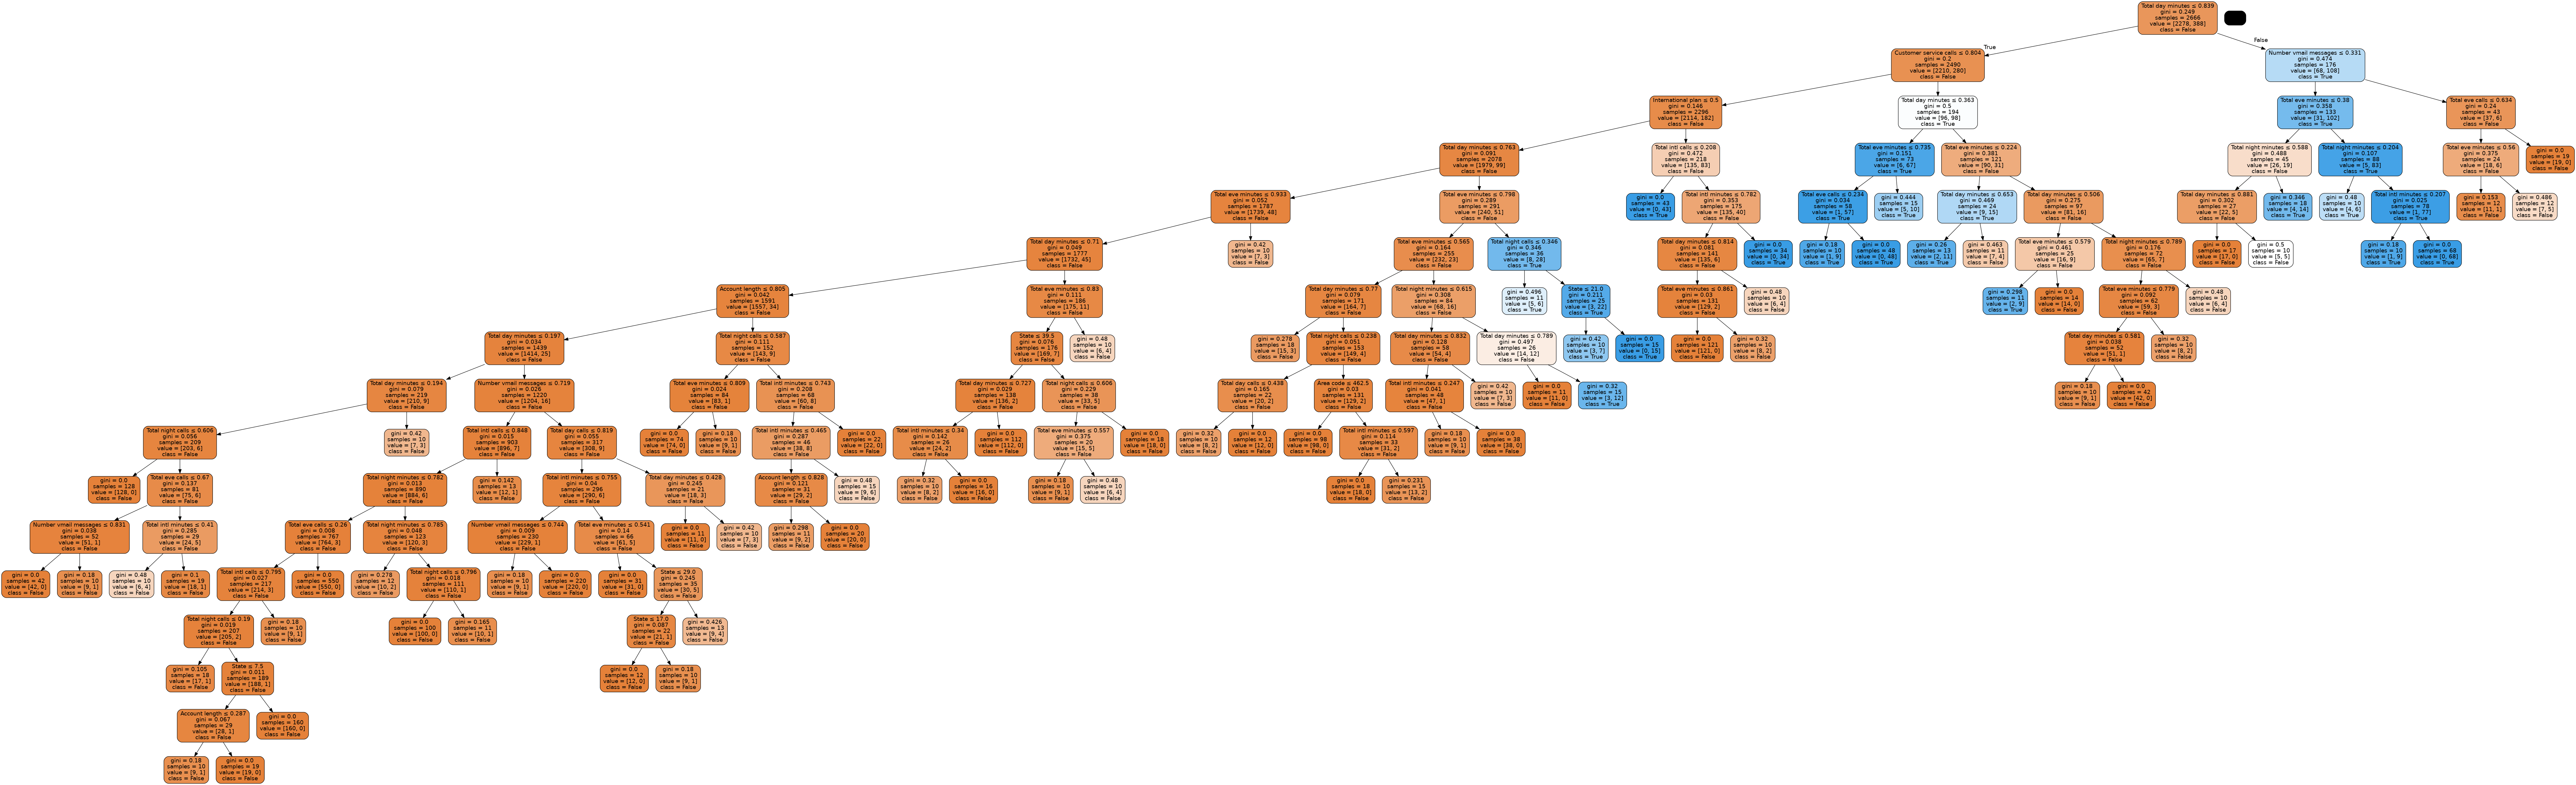

In [143]:
from six import StringIO
from IPython.display import Image
import pydotplus
import sklearn
filet = StringIO()
print(label.classes_)
sklearn.tree.export_graphviz(dt, out_file = filet, filled = True, rounded=True,
                special_characters = True, feature_names = df.columns[:-1].values,
                class_names = ['False', 'True'], label = 'all')
graph = pydotplus.graph_from_dot_data(filet.getvalue())
Image(graph.create_png())

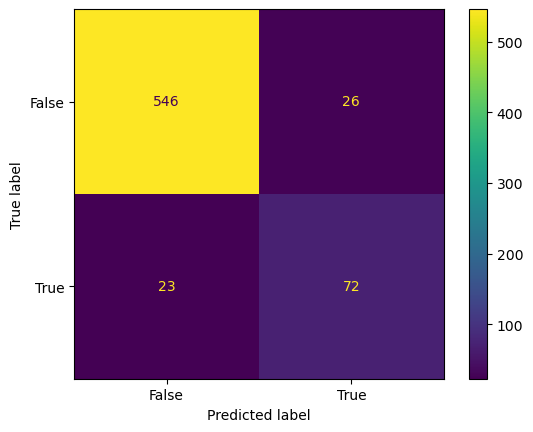

In [144]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=[False, True])
cm_display.plot()
plt.show()

In [145]:
print("roc auc, f1, recall, precision")
calc_performance(y_test, y_pred)

roc auc, f1, recall, precision


[0.85622009569378, 0.7461139896373057, 0.7578947368421053, 0.7346938775510204]

In [146]:
scores.append("Decision tree: " + format(round(accuracy * 100, 2)) + "%")
performance.append(["Decision tree"] + calc_performance(y_test, y_pred))

## Random forest

In [147]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = rf.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 93.70%


In [148]:
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}


In [149]:
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 15, 20, 30],
    'min_samples_split': [2, 10, 20, 50, 100],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2']
}

grid_rf = GridSearchCV(rf, rf_params, n_jobs=-1)
grid_rf.fit(X_train, y_train)
print(grid_rf.best_params_)

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scip

{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [150]:
rf = RandomForestClassifier(random_state=1, max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = rf.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 94.00%


In [152]:
files_rf = StringIO()
sklearn.tree.export_graphviz(rf.estimators_[0], out_file = files_rf, filled = True, rounded=True,
                special_characters = True, feature_names = df.columns[:-1].values,
                class_names = ['False', 'True'], label = 'all')
graph = pydotplus.graph_from_dot_data(files_rf.getvalue())
Image(graph.create_png())

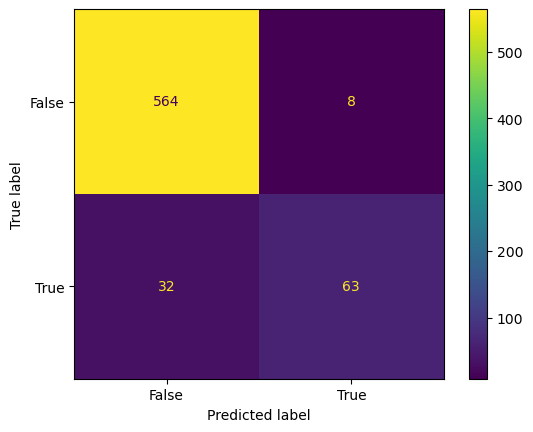

In [153]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=[False, True])
cm_display.plot()
plt.show()

In [154]:
print("roc auc, f1, recall, precision")
calc_performance(y_test, y_pred)

roc auc, f1, recall, precision


[0.824585940375414, 0.7590361445783133, 0.6631578947368421, 0.8873239436619719]

In [155]:
scores.append("Random forest: " + format(round(accuracy * 100, 2)) + "%")
performance.append(["Random forest"] + calc_performance(y_test, y_pred))

## XGBoost

In [174]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
accuracy = xgb.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 94.90%


In [175]:
print(xgb.get_params())

{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 1, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [176]:
params_xgb = {
    'n_estimators': [None, 50, 100],
    'learning_rate': [None, 0.01, 0.1],
    'max_depth': [None, 3, 6, 9],
    'subsample': [None, 0.8, 1.0],
}

In [177]:
grid_xgb = GridSearchCV(xgb, params_xgb, n_jobs = -1)
grid_xgb.fit(X_train, y_train)
print(grid_xgb.best_params_)

{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': None, 'subsample': 0.8}


In [178]:
xgb = XGBClassifier(random_state=1, learning_rate=0.1, max_depth=9, n_estimators=None, subsample=0.8)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
accuracy = xgb.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 95.50%


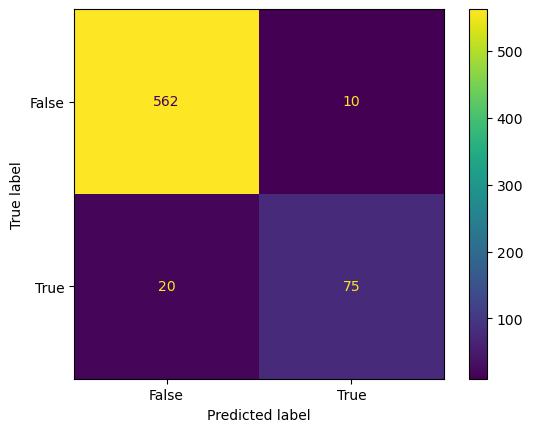

In [179]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=[False, True])
cm_display.plot()
plt.show()

In [180]:
print("roc auc, f1, recall, precision")
calc_performance(y_test, y_pred)

roc auc, f1, recall, precision


[0.8859955833640044, 0.8333333333333333, 0.7894736842105263, 0.8823529411764706]

In [181]:
scores.append("XGBoost: " + format(round(accuracy * 100, 2)) + "%")
performance.append(["XGBoost"] + calc_performance(y_test, y_pred))

## AdaBoost

In [182]:
from sklearn.ensemble import AdaBoostClassifier
estimator = RandomForestClassifier(random_state=1, max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=100)
ada = AdaBoostClassifier(estimator, random_state=1)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
accuracy = ada.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 94.00%


In [165]:
print(ada.get_params())

{'algorithm': 'SAMME.R', 'base_estimator': 'deprecated', 'estimator__bootstrap': True, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': 20, 'estimator__max_features': 'sqrt', 'estimator__max_leaf_nodes': None, 'estimator__max_samples': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__n_estimators': 100, 'estimator__n_jobs': None, 'estimator__oob_score': False, 'estimator__random_state': 1, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': RandomForestClassifier(max_depth=20, random_state=1), 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': 1}


In [169]:
ada_params = {
    'n_estimators': [20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 200],
    'learning_rate': [0.01, 0.1, 1.0],
}

In [170]:
grid_ada = GridSearchCV(ada, ada_params, n_jobs = -1)
grid_ada.fit(X_train, y_train)
grid_ada.best_params_

{'learning_rate': 0.1, 'n_estimators': 20}

In [183]:
ada = AdaBoostClassifier(estimator, random_state=1, learning_rate=0.1, n_estimators=20)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
accuracy = ada.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 94.00%


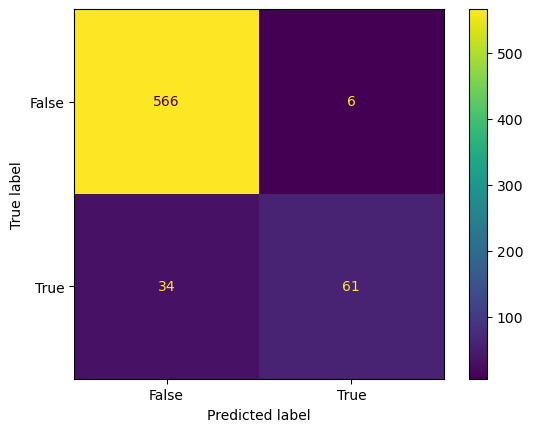

In [184]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=[False, True])
cm_display.plot()
plt.show()

In [185]:
print("roc auc, f1, recall, precision")
calc_performance(y_test, y_pred)

roc auc, f1, recall, precision


[0.815807876334192, 0.7530864197530863, 0.6421052631578947, 0.9104477611940298]

In [186]:
scores.append("AdaBoost: " + format(round(accuracy * 100, 2)) + "%")
performance.append(["AdaBoost"] + calc_performance(y_test, y_pred))

# Оценка моделей

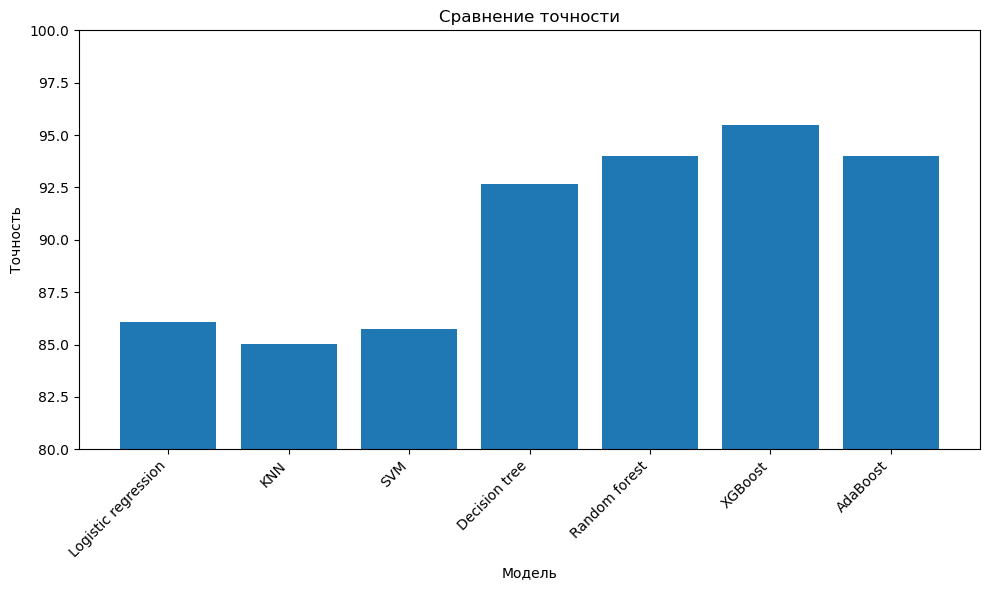

In [189]:
models = []
values = []
for item in scores:
    model, value = item.split(': ')
    models.append(model)
    values.append(float(value.strip('%')))

plt.figure(figsize=(10, 6))
plt.bar(models, values)
plt.xlabel('Модель')
plt.ylabel('Точность')
plt.title('Сравнение точности')
plt.xticks(rotation=45, ha='right')
plt.ylim(80, 100)
plt.tight_layout()

In [191]:
column_names = ['Algorithm', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
perf_metrics_dict = {name: values for name, *values in zip(column_names, *performance)}
perf_metrics_df = pd.DataFrame(perf_metrics_dict)
perf_metrics_df['Color'] = sns.color_palette('muted', n_colors=len(perf_metrics_df))
perf_metrics_df

Algorithm  Precision    Recall  F1-Score   ROC-AUC  \
0  Logistic regression   0.536861  0.146789  0.084211  0.571429   
1                  KNN   0.521964  0.107143  0.063158  0.352941   
2                  SVM   0.500000  0.000000  0.000000  0.000000   
3        Decision tree   0.856220  0.746114  0.757895  0.734694   
4        Random forest   0.824586  0.759036  0.663158  0.887324   
5              XGBoost   0.885996  0.833333  0.789474  0.882353   
6             AdaBoost   0.815808  0.753086  0.642105  0.910448   

                                               Color  
0  (0.2823529411764706, 0.47058823529411764, 0.81...  
1  (0.9333333333333333, 0.5215686274509804, 0.290...  
2    (0.41568627450980394, 0.8, 0.39215686274509803)  
3  (0.8392156862745098, 0.37254901960784315, 0.37...  
4  (0.5843137254901961, 0.4235294117647059, 0.705...  
5  (0.5490196078431373, 0.3803921568627451, 0.235...  
6  (0.8627450980392157, 0.49411764705882355, 0.75...

In [192]:
def plot_scores(ax, df, score, name='Algorithm', color_col='Color'):
    ax.barh(df[name], df[score], color=df[color_col])
    ax.set_title(score)

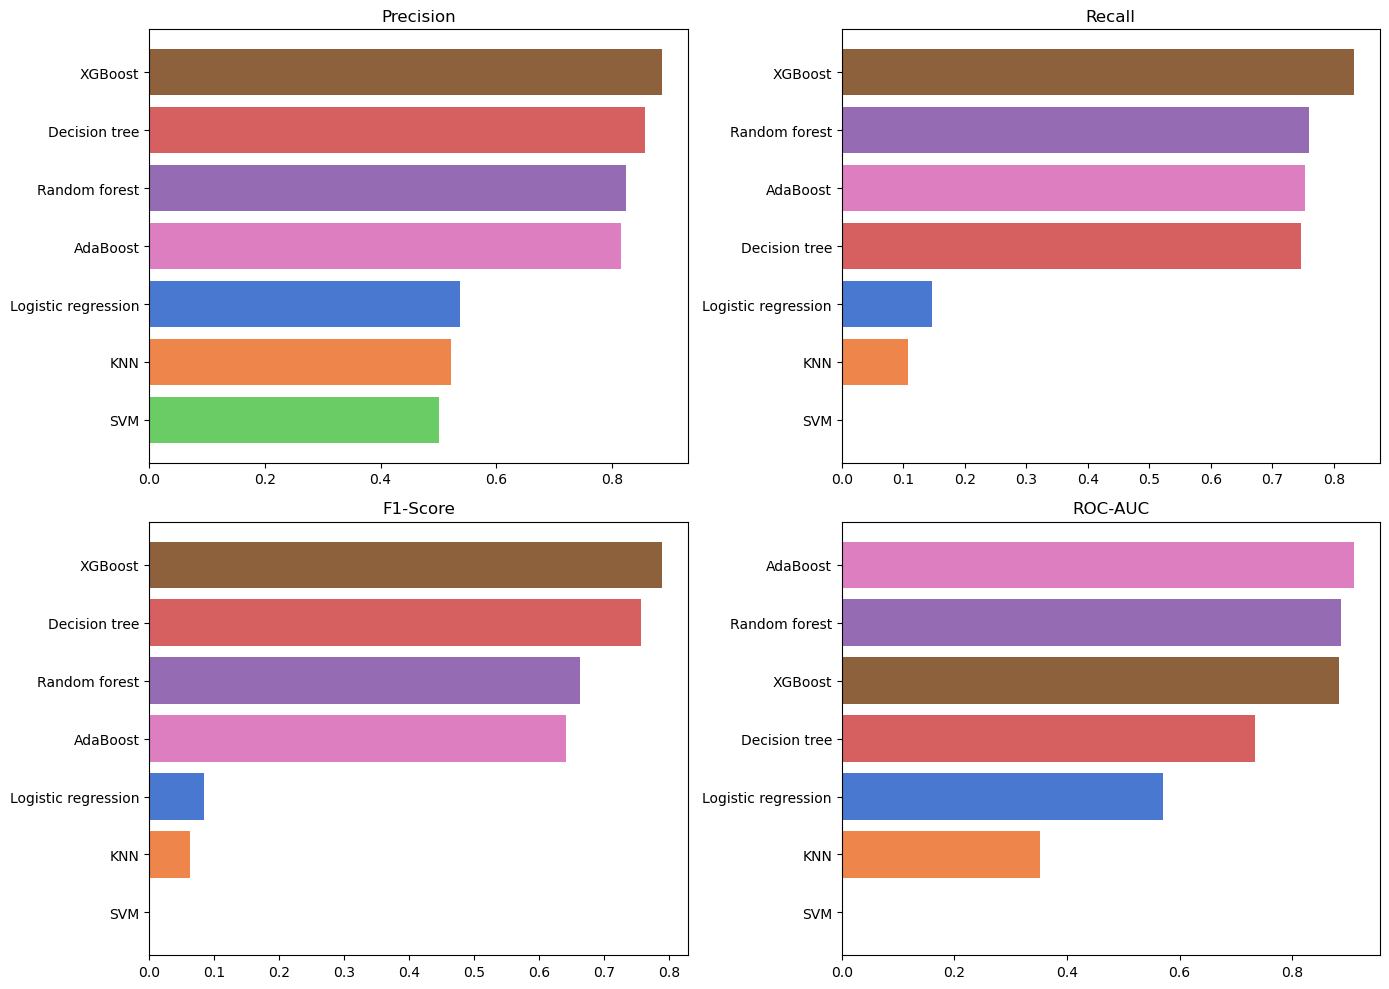

In [193]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

plot_scores(axes[0, 0], perf_metrics_df.sort_values('Precision'), 'Precision')
plot_scores(axes[0, 1], perf_metrics_df.sort_values('Recall'), 'Recall')
plot_scores(axes[1, 0], perf_metrics_df.sort_values('F1-Score'), 'F1-Score')
plot_scores(axes[1, 1], perf_metrics_df.sort_values('ROC-AUC'), 'ROC-AUC')

plt.tight_layout()
plt.show()

# AutoML

In [34]:
from pycaret.classification import setup, compare_models, evaluate_model, create_model, tune_model

In [35]:
df1 = pd.read_csv("churn-bigml-80.csv")
df2 = pd.read_csv("churn-bigml-20.csv")
df_pycaret = pd.concat([df1, df2]).reset_index(drop=True)
caret = setup(data = df_pycaret, target = 'Churn', session_id = 1, experiment_name= '1')
df_pycaret.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [38]:
best = compare_models(exclude=['lightgbm'])

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [39]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [40]:
knn_pycaret = create_model('knn')
new_knn = tune_model(knn_pycaret, optimize='Accuracy')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [41]:
print(new_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=19, p=2,
                     weights='distance')


In [42]:
svm_pycaret = create_model('svm')
svm_new = tune_model(svm_pycaret, optimize='Accuracy')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [43]:
print(svm_new)

SGDClassifier(alpha=0.5, average=False, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.05, fit_intercept=True, l1_ratio=0.1600000001,
              learning_rate='optimal', loss='hinge', max_iter=1000,
              n_iter_no_change=5, n_jobs=-1, penalty='elasticnet', power_t=0.5,
              random_state=1, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)
